# Analyzing the downloaded data

## Assumptions

You have used the `download_stenos.py` and `generate_pandas.py` to download the steno protocols and save them into a compressed pickle.

I have them under ./data/ folder, you will have to adjust the paths accordingly to your storage location.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df2010 = pd.read_csv('./data/psp2010_2013.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')
df2017 = pd.read_csv('./data/psp2017.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')
df2013 = pd.read_csv('./data/psp2013_2017.tsv.xz', sep='\t', header=0, encoding='utf-8', compression='xz')

print("Pandas version: {}".format(pd.__version__))

df2017.columns

Pandas version: 0.24.1


Index(['session', 'date', 'topic_idx', 'topic_str', 'order', 'name',
       'steno_name', 'file_name', 'tokens', 'birthyear', 'age', 'sex',
       'titles', 'party', 'text'],
      dtype='object')

The data frame contains interventions in each two and the following columns:
   
   - 'session', 'date', 'topic_idx', 'topic_str', 'order', 
     The session, the date of the session, the topic being discussed, and the order of intervention for the session
   
   - 'name','steno_name', 
     The name of the speacker and the string that appears in the steno protocol
   
       - 'age', 'sex', 'titles','party', 'birthday'
       Information about the speaker; `age is the age at the time of the last steno of the dataset`
   
   - 'file_name', 'text', 
     The file name that contains the information, and the text in the filed
   
   - 'tokens', 
     The number of tokens on the unfiltered file


We have loaded all the stenos and metadata from the sessions between 2013-2017 in the df2013 data frame and the protocols from 2017 into df2017, the data frames have the following columns.

Let's do a sanity check and veorify that there are no dupplicates in the text field (i.e. same content downloaded in two differnt files)

In [2]:
dup_count = df2010.duplicated(["session", "topic_idx", "text"]).sum()
if dup_count > 0:
    print(f"WARNING: found {dup_count} dupplicates in data set df2010")
    print("          Correcting...")
    df2010 = df2010.drop_duplicates(["session", "topic_idx", "text"], keep='first')
    print(f"  {df2010.duplicated(['session', 'topic_idx', 'text']).sum()} dupplicates in data set {name} after correction")
else:
        print(f"No dupplicates in data set df2010")

dup_count = df2013.duplicated(["session", "topic_idx", "text"]).sum()
if dup_count > 0:
    print(f"WARNING: found {dup_count} dupplicates in data set df2013")
    print("          Correcting...")
    df2013 = df2013.drop_duplicates(["session", "topic_idx", "text"], keep='first')
    print(f"  {df2013.duplicated(['session', 'topic_idx', 'text']).sum()} dupplicates in data set {name} after correction")
else:
        print(f"No dupplicates in data set df2013")
        
dup_count = df2017.duplicated(["session", "topic_idx", "text"]).sum()
if dup_count > 0:
    print(f"WARNING: found {dup_count} dupplicates in data set df2017")
    print("         Correcting...")
    df2017 = df2017.drop_duplicates(["session", "topic_idx", "text"], keep='first')
    print(f"  {df2017.duplicated(['session', 'topic_idx', 'text']).sum()} dupplicates in data set {name} after correction")
else:
        print(f"No dupplicates in data set df2017")

No dupplicates in data set df2010
No dupplicates in data set df2013
No dupplicates in data set df2017


In [3]:
print("2010-2013")
print("\tTotal files:  {}".format(df2010["tokens"].count()))
print("\tTotal tokens: {}".format(df2010["tokens"].sum()))

print("2013-2017")
print("\tTotal files:  {}".format(df2013["tokens"].count()))
print("\tTotal tokens: {}".format(df2013["tokens"].sum()))


print("2017-")
print("\tTotal files:  {}".format(df2017["tokens"].count()))
print("\tTotal tokens: {}".format(df2017["tokens"].sum()))

2010-2013
	Total files:  10716
	Total tokens: 2096896
2013-2017
	Total files:  28939
	Total tokens: 5620010
2017-
	Total files:  15139
	Total tokens: 3057989


We can see who are the people that have more tokens, for that we will group the data frame by `name` and sum the tokens. Finally we can take the 20 largest.

In [4]:
top_n = 20
g_name_2010 = df2010.groupby(["name","party"])
print("Total number of different speakers: {}\n".format(len(g_name_2010)))
print("Top {} speakers by number of tokens for 2010-2013".format(top_n))
g_name_2010[["party","tokens"]].sum(level=0).nlargest(top_n, "tokens")

Total number of different speakers: 269

Top 20 speakers by number of tokens for 2010-2013


,,tokens
name,party,
Bohuslav Sobotka,ČSSD,69576
Miroslav Kalousek,TOP09,60433
Lubomír Zaorálek,ČSSD,55295
Jeroným Tejc,ČSSD,54858
Jiří Paroubek,ČSSD,46637
David Rath,ČSSD,43154
Antonín Seďa,ČSSD,40404
Michal Doktor,ODS,33029
Vojtěch Filip,KSČM,29640


In [5]:
top_n = 20
g_name_2013 = df2013.groupby(["name","party"])
print("Total number of different speakers: {}\n".format(len(g_name_2013)))
print("Top {} speakers by number of tokens for 2013-2017".format(top_n))
g_name_2013[["party","tokens"]].sum(level=0).nlargest(top_n, "tokens")

Total number of different speakers: 260

Top 20 speakers by number of tokens for 2013-2017


,,tokens
name,party,
Zbyněk Stanjura,ODS,387564
Bohuslav Sobotka,ČSSD,267594
Miroslav Kalousek,TOP09,187703
Petr Bendl,ODS,134829
František Laudát,TOP09,112293
Andrej Babiš,ANO2011,111385
Martin Kolovratník,ANO2011,105232
Vojtěch Filip,KSČM,103694
Ludvík Hovorka,KDU-ČSL,97121


In [6]:
top_n = 20
g_name_2017 = df2017.groupby(["name","party"])
print("Total number of different speakers: {}\n".format(len(g_name_2017)))

print("Top {} speakers by number of tokens for 2017".format(top_n))
g_name_2017[["party","tokens"]].sum(level=0).nlargest(top_n, "tokens")


Total number of different speakers: 263

Top 20 speakers by number of tokens for 2017


,,tokens
name,party,
Zbyněk Stanjura,ODS,139704
Andrej Babiš,ANO2011,91046
Alena Schillerová,ANO2011,82463
Martin Kolovratník,ANO2011,79072
Jakub Michálek,Piráti,74209
Tomio Okamura,SPD,68445
Miroslav Kalousek,TOP09,62115
Adam Vojtěch,ANO2011,61914
Vojtěch Munzar,ODS,56799


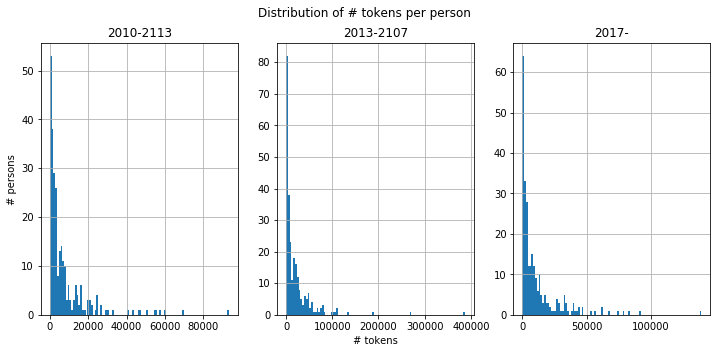

In [7]:
matplotlib.rcParams['figure.figsize'] = [12, 5]

plt.suptitle("Distribution of # tokens per person")
ax1=plt.subplot(131)
df2010.groupby(["name"])["tokens"].sum().hist(bins=100, ax=ax1)
plt.ylabel("# persons")
plt.title("2010-2113")
ax1=plt.subplot(132)
df2013.groupby(["name"])["tokens"].sum().hist(bins=100, ax=ax1)
plt.title("2013-2107")
plt.xlabel("# tokens")
ax1=plt.subplot(133)
df2017.groupby(["name"])["tokens"].sum().hist(bins=100, ax=ax1)
_ = plt.title("2017-")


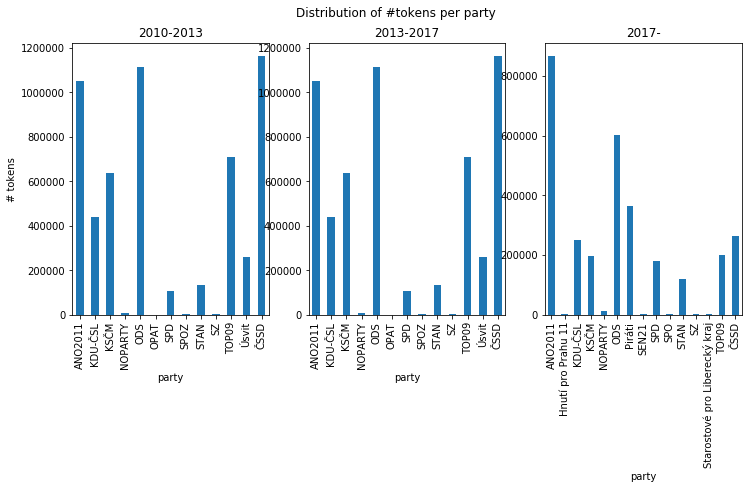

In [8]:
plt.suptitle('Distribution of #tokens per party')

ax1 = plt.subplot(131)
kk=df2013.groupby(["party"])["tokens"].sum().plot.bar(ax=ax1)
plt.ylabel("# tokens")
_ = plt.title("2010-2013")

ax1 = plt.subplot(132)
kk=df2013.groupby(["party"])["tokens"].sum().plot.bar(ax=ax1)
_ = plt.title("2013-2017")

ax1 = plt.subplot(133)
kk=df2017.groupby(["party"])["tokens"].sum().plot.bar(ax=ax1)
_ = plt.title("2017-")



Now let's count how many interventions have more than 1000 tokens

In [9]:
limit = 1000
long2010 = df2010[df2010["tokens"] > limit]["text"].count()
long2010_tokens = df2010[df2010["tokens"] > limit]["tokens"].sum()
long2013 = df2013[df2013["tokens"] > limit]["text"].count()
long2013_tokens = df2013[df2013["tokens"] > limit]["tokens"].sum()
long2017 = df2017[df2017["tokens"] > limit]["text"].count()
long2017_tokens = df2017[df2017["tokens"] > limit]["tokens"].sum()
print(f"Long interventions (more than {limit} tokens) in 2010-2013: {long2010} - total tokens {long2010_tokens} ")
print(f"Long interventions (more than {limit} tokens) in 2013-2017: {long2013} - total tokens {long2013_tokens} ")
print(f"Long interventions (more than {limit} tokens) in 2017: {long2017} - total tokens {long2017_tokens}")


Long interventions (more than 1000 tokens) in 2010-2013: 60 - total tokens 66149 
Long interventions (more than 1000 tokens) in 2013-2017: 171 - total tokens 192204 
Long interventions (more than 1000 tokens) in 2017: 102 - total tokens 115672


Finally we can aggregate the tokens per speaker per session and topic and check the number of tokens we obtain considering only those speakers that have an aggregated number of tokens per session over 1000

In [10]:
limit = 1000
grp2010 = df2010.groupby(by=["name", "session", "topic_idx"])
grp2013 = df2013.groupby(by=["name", "session", "topic_idx"])
grp2017 = df2017.groupby(by=["name", "session", "topic_idx"])
long2010 = grp2010["tokens"].sum()[ grp2010["tokens"].sum() > limit ].count()
long2010_tokens = grp2010["tokens"].sum()[ grp2010["tokens"].sum() > limit].sum()
long2013 = grp2013["tokens"].sum()[ grp2013["tokens"].sum() > limit ].count()
long2013_tokens = grp2013["tokens"].sum()[ grp2013["tokens"].sum() > limit].sum()
long2017 = grp2017["tokens"].sum()[ grp2017["tokens"].sum() > limit].count()
long2017_tokens = grp2017["tokens"].sum()[ grp2017["tokens"].sum() > limit].sum()
print(f"Long aggregated interventions (more than {limit} tokens) in 2010-2013: {long2010} - total tokens {long2010_tokens}")
print(f"Long aggregated interventions (more than {limit} tokens) in 2013-2017: {long2013} - total tokens {long2013_tokens}")
print(f"Long aggregated interventions (more than {limit} tokens) in 2017: {long2017} - total tokens {long2017_tokens}")


Long aggregated interventions (more than 1000 tokens) in 2010-2013: 339 - total tokens 560628
Long aggregated interventions (more than 1000 tokens) in 2013-2017: 923 - total tokens 1564650
Long aggregated interventions (more than 1000 tokens) in 2017: 587 - total tokens 949478


Text(0.5,1,'Tokens per speech in 2017-')

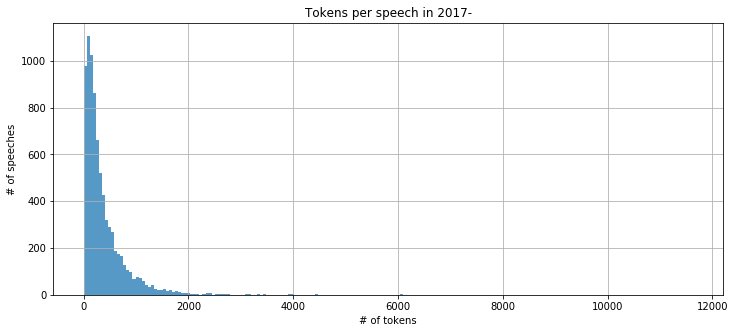

In [12]:
# Create a groupby object and then build a data frame with sum of tokens and appended strings, group by more fields if required
g2017 = df2017.groupby(['session', 'topic_idx', 'name'])
df2017agg = pd.merge(g2017['tokens'].sum(), g2017['text'].sum(), left_index=True, right_index=True).reset_index()
_ = plt.hist(df2017agg['tokens'], bins=200, alpha=0.75)
plt.grid()
plt.ylabel("# of speeches")
plt.xlabel('# of tokens')
plt.title('Tokens per speech in 2017-')

In [17]:
df2017agg[df2017agg['tokens']>limit]

,session,topic_idx,name,tokens,text
39,1,7,Pavel Bělobrádek,1315,"Vážený pane předsedající, kolegyně, kolegové, ..."
47,1,7,Zbyněk Stanjura,1007,"Hezké dopoledne, pane předsedající, členové vl..."
50,1,9,Andrej Babiš,1124,"Takže dobrý den, vážený pane předsedající. Kol..."
63,1,9,Miroslav Kalousek,1861,"Děkuji za slovo, pane předsedo. Vážené paní po..."
68,1,9,Radek Vondráček,2041,"Tak uvidíme, jestli zůstanu poslední. Vážené k..."
71,1,9,Vojtěch Filip,1061,"Děkuji. Pane předsedající, členové vlády, paní..."
72,1,9,Zbyněk Stanjura,1389,"Tak ty stenozáznamy, to je věc! Já jsem citova..."
83,1,11,Martin Kolovratník,1143,Děkuji za slovo. Teď už to bude stručné a krát...
183,3,2,Miloslav Ludvík,2274,"Děkuji, pane předsedající. Dámy a pánové, i já..."
195,3,2,Zbyněk Stanjura,1691,"Děkuji za slovo. Já mám jedno oznámení, jeden ..."
